In [1]:
from itertools import chain
from collections import Counter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')
%matplotlib inline 

## Introduction to Linear Regression 

Linear regression is used to predict a continous variable using an extension of the slope intercept formulay y = mx + b
 
 ##### Assumptions of Linear Regression
 
+   Linear relationship (as x goes up, y either goes up or down (but doesn't act totally randomly)
+   Multivariate normality (x and y variables have bell curved distrobutions) 
+   No or little multicollinearity: , there is minimal (less than .3) correlation between x variables
+   No auto-correlation: (rows cannot be dependent on other rows) 
+   Homoscedasticity:(residuals are eually distributed across the regression line

#### Example of Directly Solving Linear Regression with Linear Algebra

In [2]:
import numpy as np

# this data set is y = 2*x + noise 

x = np.reshape(np.arange(100) + np.random.normal(size=(100)), (100,1) )
y = np.reshape(np.arange(100) * 2, (-1,1))

### Linear Regression by hand using the normal equations

c = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x )),   np.transpose(x)),  y)[0][0]
print('coefficient of x:', c)
print('this means our model is y = {} * x + 0'.format(c))


coefficient of x: 2.001582110856181
this means our model is y = 2.001582110856181 * x + 0


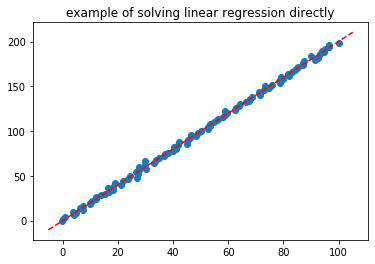

In [3]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(x, y)
abline(c, 0)
plt.title('example of solving linear regression directly')
plt.show()


#### Modern Regression has the following components
+ Coefficients (weights)
+ coefficient p_values (availible depending on the method) 
+ interecept (optional)
+ Optimizer (Solver) in most cases OLS (Ordinary Least Squared Regression) but potentilly SDG stochastic grantient descent
+ Loss Function 
    + mean squared error (more sensitive to outliers)
    + root mean squared error
+ Metrics
    + R Squared  (percent of variance explained), between 0,1, in practice should be .7 and higher
        + 1.0 indicattes 100% varience explained
        + 0 indcates 0% varience explained (model is totally worthless)
    + Correlation (between prediction and outcome) between -1 and 1, should be .8 and higher
        + 0 indicates model predictions and actualls are not related (the move independently of eachother)
          
        + 1 indicates as actuals go up, predictions go up by the same ammount
        + -1 indicates the model predicts in the opposite direction (goes down when the actualls go up)
     + MAPE mean average percent error
     + RMSE  mean of all predictins where  sqrt((actual - predicted)^2)
     + MSE mean squared error, mean of all predictins where  (actual - predicted)^2)
        



#### Examples use Air B and B data
Objective: find the words that are correlated with high cost listings
    

In [4]:
import pandas as pd
path = '../data/AB_NYC_2019.csv'

df = pd.read_csv(path, encoding='iso-8859-1')
print(df.shape)
df.head()


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, binary=True).fit(df['name'].fillna(''))
x = cv.transform(df['name'].fillna('')).toarray()
y = df['price'].fillna(0)

pd.DataFrame(x, columns = cv.get_feature_names()).head()


,1br,2br,amazing,and,apartment,apt,astoria,away,balcony,bath,...,train,two,upper,view,views,village,west,williamsburg,with,york
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True).fit(x, y)

In [76]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


imp = pd.DataFrame({'coef': model.coef_, 'feature_names':cv.get_feature_names()})
imp = imp.sort_values(by='coef', ascending = True)
imp

,coef,feature_names
75,-67.945586,room
20,-46.536710,bushwick
49,-37.323022,jfk
28,-32.556898,comfortable
72,-32.465979,prospect
29,-29.087982,comfy
30,-28.833558,cozy
82,-25.516875,studio
71,-24.591589,private
92,-24.294305,upper


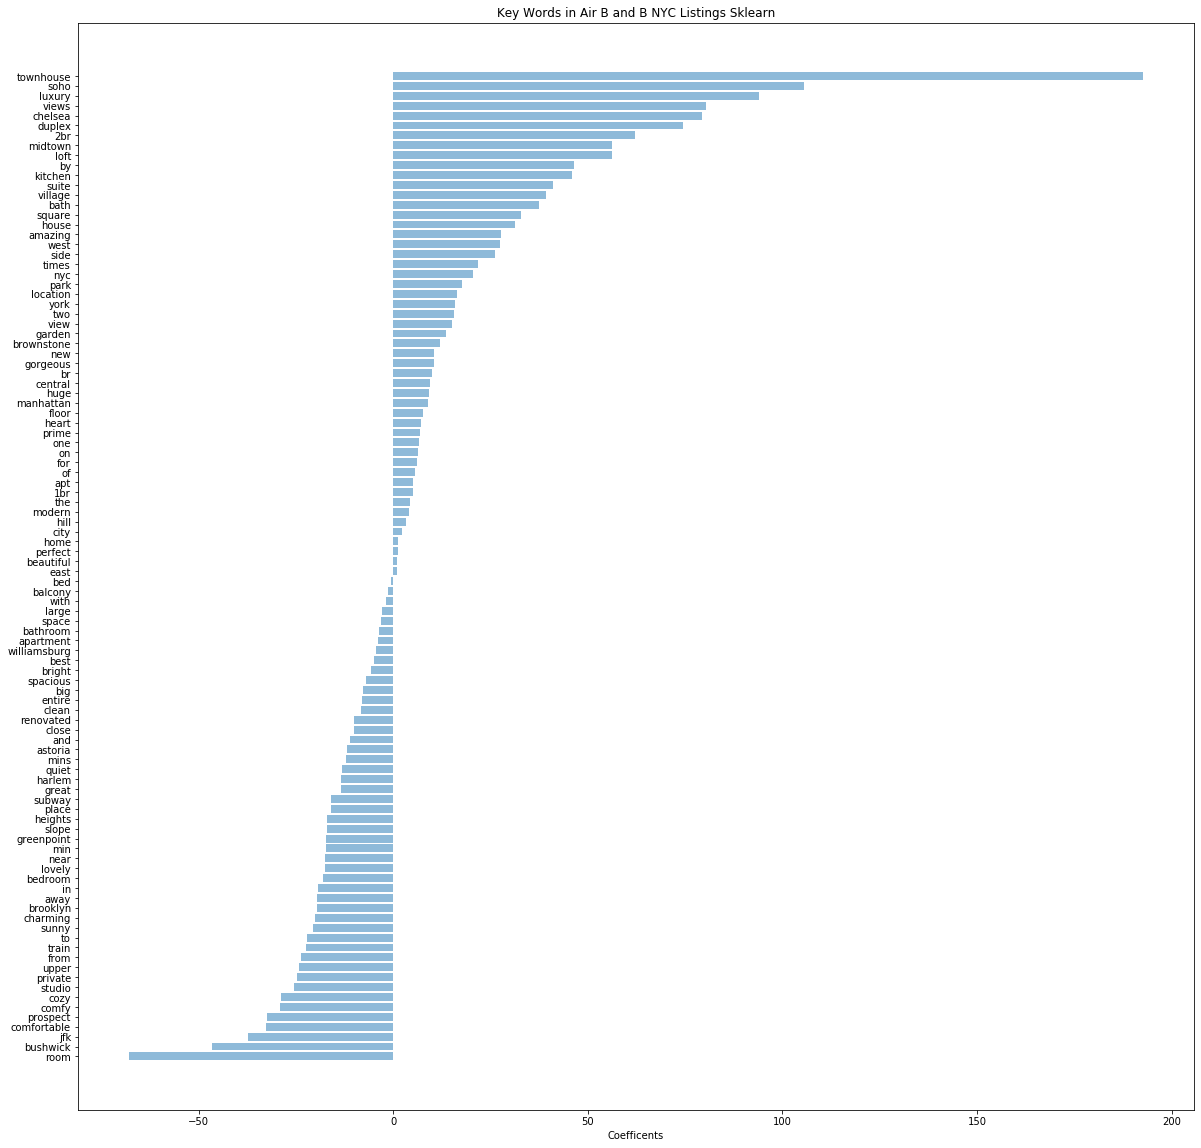

In [84]:
## Plotting Results of Coefficents
# setup figure size
plt.figure(figsize=(20,20))

# create a list of integers to use for a y position
y_pos = np.arange(len(imp['feature_names']))

# create bar plot
plt.barh(imp['feature_names'], imp['coef'], align='center', alpha=0.5)

# add tick labels using feature names at positions in p_pos
plt.yticks(y_pos, imp['feature_names'])

plt.xlabel('Coefficents')
plt.title('Key Words in Air B and B NYC Listings Sklearn')

plt.show()


### Filtering for Significant P Values

When filter out high p values, the story in the data is very different, items that appear to be correlated with lower prices, actually turn out to be not signficant

+ This model is create with the stats model API, that can (unlike sklearn) calcuate p values for every coefficent

In [85]:


# using stats model API


from statsmodels.api import GLM
m = GLM(exog = x, endog=y).fit()
m.summary()

results = pd.DataFrame({'p': m.pvalues, 'coef': m._results.params, 'feature_names':cv.get_feature_names()})

# filter out high p values (greater than .01)
results  = results.loc[results['p'] < .01]


# sort results
results = results.sort_values(by='coef', ascending = True)
results

,p,coef,feature_names
x4,1.605563e-03,15.174215,and
x62,3.834292e-03,15.795309,near
x89,1.330051e-03,17.579141,to
x18,3.215899e-03,17.630673,bright
x52,2.297823e-04,20.068718,large
x27,1.933802e-03,22.481010,clean
x33,7.130361e-04,23.344791,east
x81,7.595274e-10,25.378400,spacious
x99,3.285412e-08,26.433713,with
x71,1.368687e-03,27.774051,prime


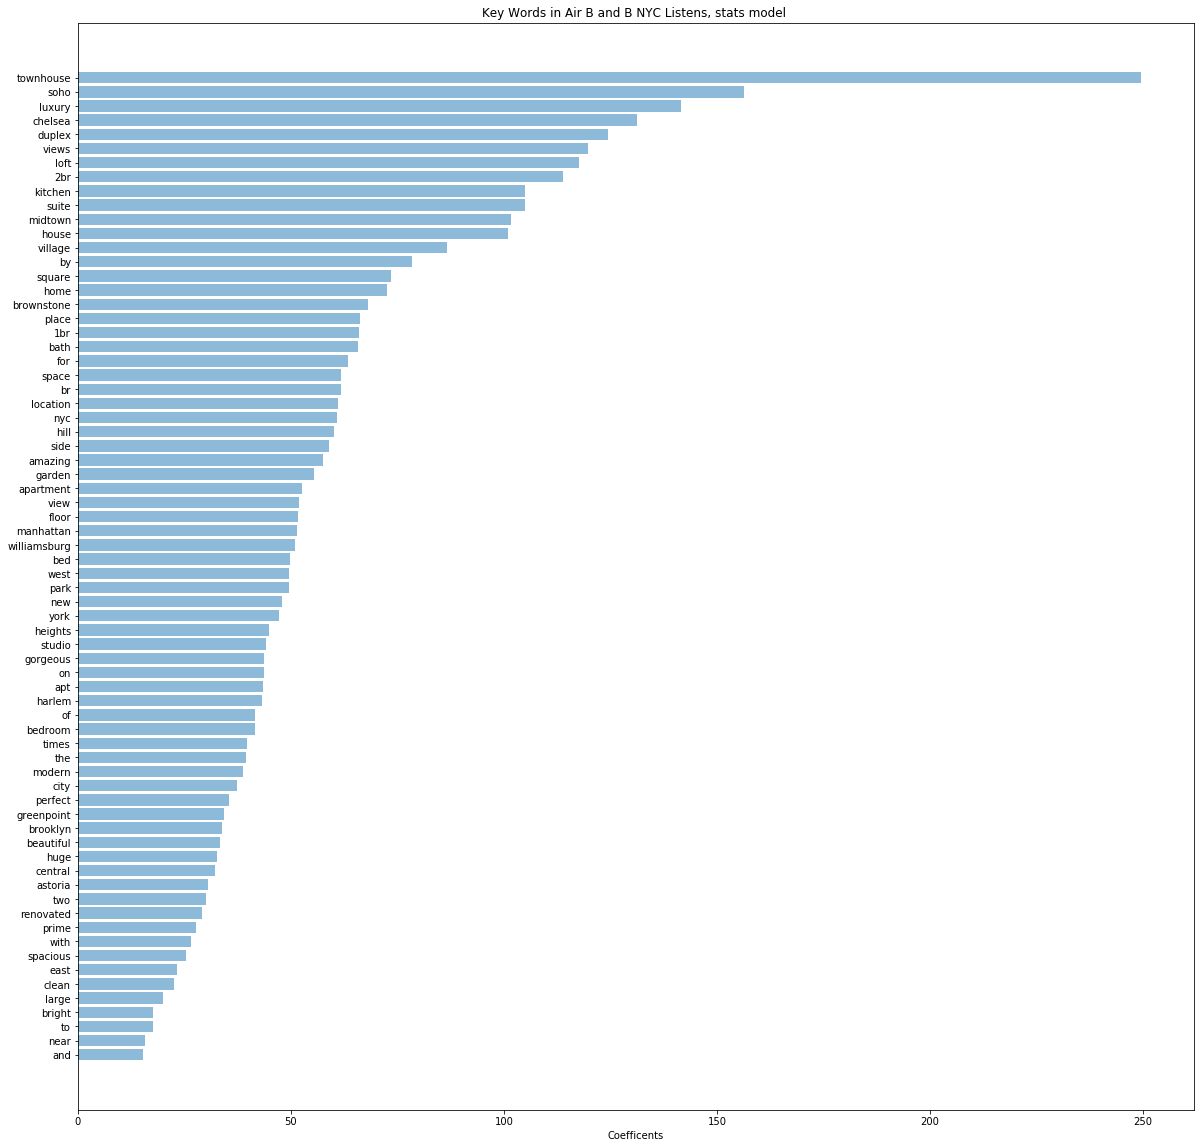

In [82]:
## Plotting Results of Coefficents
plt.figure(figsize=(20,20))
objects = results['feature_names']
y_pos = np.arange(len(results['feature_names']))

plt.barh(results['feature_names'], results['coef'], align='center', alpha=0.5)
plt.yticks(y_pos, results['feature_names'])
plt.xlabel('Coefficents')
plt.title('Key Words in Air B and B NYC Listens, stats model ')

plt.show()

#### Task - find the  5 most over priced listing

In [90]:
## predict every row of data
preds = model.predict(x)

# create a prediction column to in the original data frame to store predictions
df['preds'] = preds

# calculate the difference between actual and prediction
df['diff'] = df['price'] - df['preds']

# sort by the difference
df.sort_values(by='diff', ascending=False).head()[['name', 'price', 'preds', 'diff']]

,name,price,preds,diff
9151,Furnished room in Astoria apartment,10000,67.949243,9932.050757
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999,149.597917,9849.402083
6530,Spanish Harlem Apt,9999,162.656956,9836.343044
29238,1-BR Lincoln Center,10000,181.068534,9818.931466
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999,297.936890,9701.063110


#### Task - find the 5 most underpriced listing 

In [91]:

# sort by the difference
df.sort_values(by='diff', ascending=True).head()[['name', 'price', 'preds', 'diff']]

,name,price,preds,diff
30629,Luxury Townhouse w Balcony in West Village / Soho,200,609.200358,-409.200358
21861,One BR duplex loft in midtown east townhouse - 43,160,548.860143,-388.860143
2898,West Village townhouse private suite incl bath,139,484.271487,-345.271487
18743,Private Bed/Bath in SOHO Townhouse +Office/Dec...,129,462.016641,-333.016641
26588,1600 sq ft Luxury Duplex Townhouse-Carroll Gar...,200,532.189657,-332.189657


#### Is this model any good ?

In [93]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, matthews_corrcoef
y_true = df['price'].fillna(0)
y_preds = model.predict(x)

In [94]:
# Explained variance suggest we only understand about 7% of the varience
explained_variance_score(y_true, y_preds)

0.07273876400513557

In [96]:
## r2_score (coeficient of determinenation suggest prices and predictions are not all the well correlated)
r2_score(y_true, y_preds)

0.07273876400513568

In [98]:
## MAE suggest on average how wrote is each prediction
mean_absolute_error(y_true, y_preds)



80.23450826628039